In [11]:
import cv2 
import matplotlib.pyplot as plt 

In [12]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """ 
    Gives the coordinates to draw centered 
    """

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] /2
    text_y = point[1] - text_size[1] /2

    return round(text_x), round(text_y)

In [13]:
def sort_contours_size(conts):
    """Sort Contour based on their SIZE """

    conts_sizes = [cv2.contourArea(contour) for contour in conts]
    (conts_sizes, conts) = zip(*sorted(zip(conts_sizes, conts)))

    return conts_sizes, conts

In [14]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(2, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

fig = plt.figure(figsize=(9, 9))
plt.rcParams['figure.facecolor'] = "silver"

<Figure size 648x648 with 0 Axes>

In [15]:
#Loading the image
image = cv2.imread("images/shapes_sizes.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
#Thresholding to get a Binary Image
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

In [17]:
#Finding Contour
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Detected Contours '{}'".format(len(contours)))

Detected Contours '10'


Sort the Contours based on the size

In [18]:
(contour_sizes, contours) = sort_contours_size(contours)

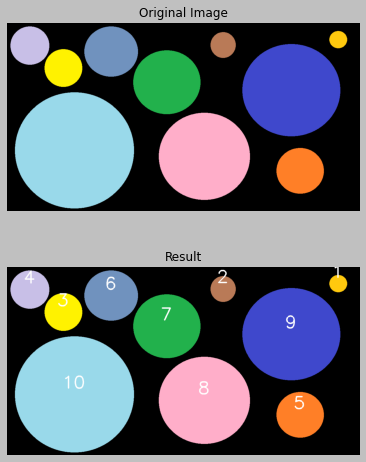

In [19]:
img_plt(image, "Original Image",1)

for i, (size, contour) in enumerate(zip(contour_sizes, contours)):
    # Compute the moment of contour:
    M = cv2.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:
    (x, y) = get_position_to_draw(str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 2, 5)

    # Write the ordering of the shape on the center of shapes
    cv2.putText(image, str(i+1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4)


img_plt(image, "Result", 2)
plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()